# Rețele neuronale feedforward

Importuri necesare

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

XOR

In [2]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0]).reshape(4,)
mlp = MLPClassifier(hidden_layer_sizes=(2,), activation='relu')
mlp.fit(X, y)
mlp.coefs_ = [np.array([[ -1.0 ,  1.0], [1.0, -1.0]]), np.array([[1.0],[1.0]])]
mlp.intercepts_ = [np.array([-0.5, -0.5]), np.array([0.0])]
y_pred=mlp.predict(X)                     
print(y_pred)

[0 1 1 0]


Suprafata de decizie

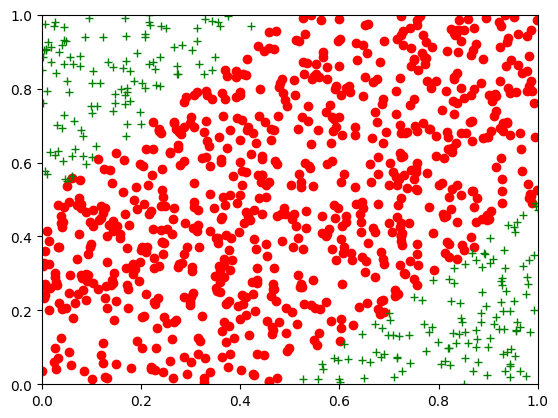

In [3]:
points = np.random.rand(1000,2)
labels = mlp.predict(points)
plt.ylim((0, 1))    
plt.xlim((0, 1))  
plt.plot(points[labels == 0, 0], points[labels == 0, 1], 'ro')
plt.plot(points[labels == 1, 0], points[labels == 1, 1], 'g+')
plt.show()

In [7]:
mlp2 = MLPClassifier(hidden_layer_sizes=(10,), activation='relu',solver='lbfgs',alpha=0.001, max_iter=10000)
mlp2.fit(X, y)                   
y_pred=mlp2.predict(X)            
print(y_pred)

[0 1 1 0]


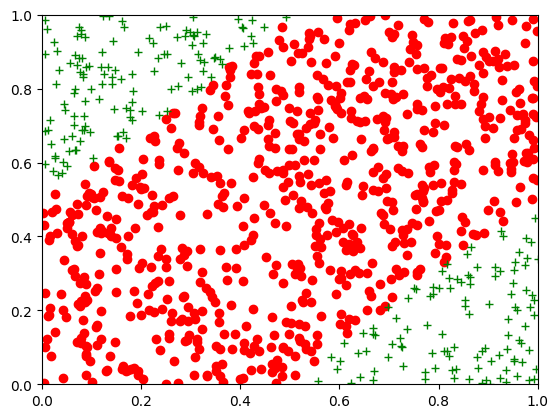

In [5]:
points = np.random.rand(1000,2)
labels = mlp2.predict(points)
plt.ylim((0, 1))    
plt.xlim((0, 1))  
plt.plot(points[labels == 0, 0], points[labels == 0, 1], 'ro')
plt.plot(points[labels == 1, 0], points[labels == 1, 1], 'g+')
plt.show()


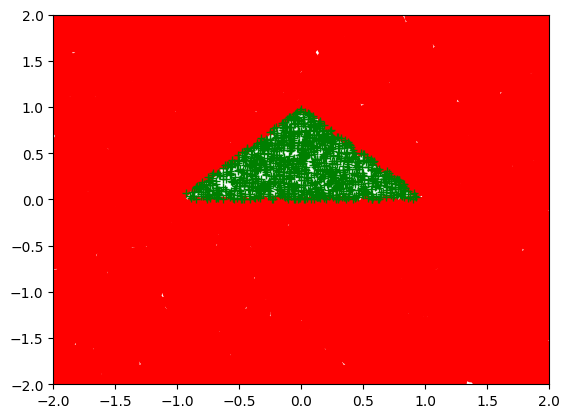

array([ 1.61529333, -1.83973643])

In [20]:
def label(x, y):
    if (x-y+1 >= 0) and (y>=0) and (-x-y+1>=0):
        return 1
    else:
        return 0

points = np.random.rand(20000, 2)*4-2
labels = np.array([label(point[0], point[1]) for point in points])
plt.ylim((-2, 2))
plt.xlim((-2, 2))
plt.plot(points[labels == 0, 0], points[labels == 0, 1], 'ro')
plt.plot(points[labels == 1, 0], points[labels == 1, 1], 'g+')
plt.show()

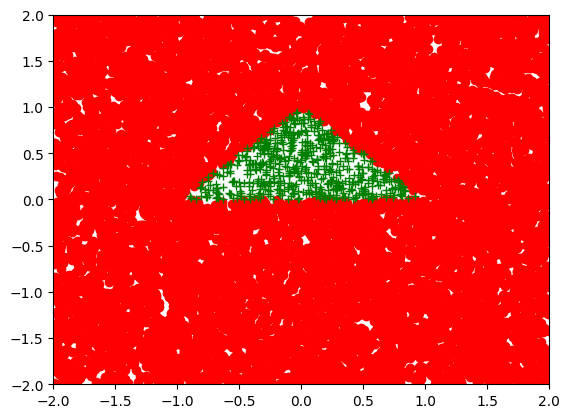

In [24]:
train_points = points[:10000]
train_labels = labels[:10000]
test_points = points[10000:]
test_labels = labels[10000:]

plt.ylim((-2, 2))
plt.xlim((-2, 2))
plt.plot(train_points[train_labels == 0, 0], train_points[train_labels == 0, 1], 'ro')
plt.plot(train_points[train_labels == 1, 0], train_points[train_labels == 1, 1], 'g+')
plt.show()


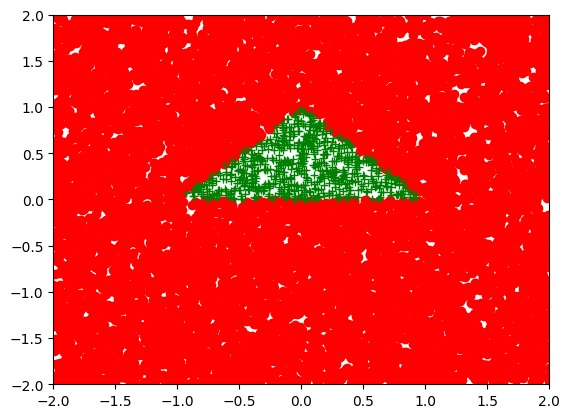

In [25]:
plt.ylim((-2, 2))
plt.xlim((-2, 2))
plt.plot(test_points[test_labels == 0, 0], test_points[test_labels == 0, 1], 'ro')
plt.plot(test_points[test_labels == 1, 0], test_points[test_labels == 1, 1], 'g+')
plt.show()


0.997080291970803


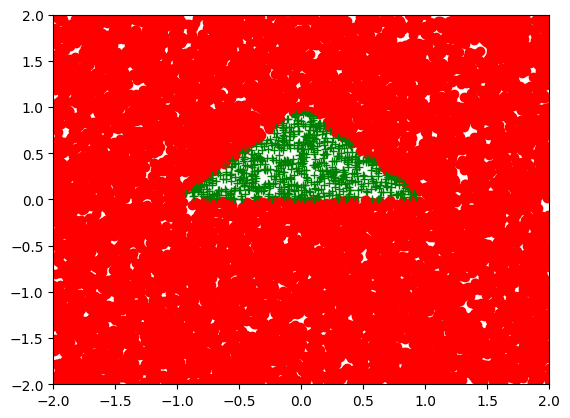

In [41]:
from sklearn.metrics import accuracy_score,f1_score

mlp2 = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='lbfgs', alpha=0.001, max_iter=500)
mlp2.fit(train_points, train_labels)
y_pred = mlp2.predict(test_points)

print(f1_score(y_pred, test_labels))
plt.ylim((-2, 2))
plt.xlim((-2, 2))
plt.plot(test_points[y_pred == 0, 0], test_points[y_pred == 0, 1], 'ro')
plt.plot(test_points[y_pred == 1, 0], test_points[y_pred == 1, 1], 'g+')
plt.show()
